In [48]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Data set
The dataset used in this notebook is an open-source database including information on terrorist attacks around the world from 1970 through 2017. This dataset includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period. 

In [49]:
df=pd.read_csv("terrorismData.csv") #Read dataset

# Data Inspection

In [50]:
df.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


In [52]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [53]:
df.tail()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives
181690,2017,12,31,Philippines,Maguindanao,Southeast Asia,Cotabato City,7.209594,124.241966,Bombing/Explosion,0.0,0.0,Unknown,12/31/2017: An explosive device was discovered...,Unknown,Unknown,Explosives


In [54]:
type(df)


pandas.core.frame.DataFrame

In [55]:
df.shape


(181691, 17)

# Data Cleaning

In [56]:
df.duplicated().value_counts()

False    172187
True       9504
dtype: int64

In [57]:
df.drop_duplicates(inplace=True)

In [58]:
df.shape

(172187, 17)

In [59]:
df.isnull().sum().sort_values( ascending=False)

Summary        59092
Wounded        15267
Killed          9433
Longitude       4012
Latitude        4011
Target           544
City             434
State            421
Month              0
Day                0
Country            0
Weapon_type        0
Region             0
Target_type        0
AttackType         0
Group              0
Year               0
dtype: int64

In [60]:
df['Wounded'].mode()

0    0.0
dtype: float64

In [61]:
df['City'].mode()

0    Unknown
dtype: object

In [62]:
df['Wounded'].fillna(0,inplace=True)

In [63]:
df['Killed'].fillna(0,inplace = True)

In [64]:
df['Longitude'].fillna(method='ffill', inplace=True)

In [65]:
df['Latitude'].fillna(method='ffill', inplace=True)

In [66]:
df['Target'].fillna(df['Target'].mode()[0], inplace=True)

In [67]:
df['City'].fillna(df['City'].mode()[0], inplace=True)

In [68]:
df['State'].fillna(method='bfill' , inplace=True)

In [69]:
df.drop('Summary',axis=1,inplace=True)

In [70]:
df.isnull().sum()

Year           0
Month          0
Day            0
Country        0
State          0
Region         0
City           0
Latitude       0
Longitude      0
AttackType     0
Killed         0
Wounded        0
Target         0
Group          0
Target_type    0
Weapon_type    0
dtype: int64

In [71]:
df.shape

(172187, 16)

In [72]:
df[['Wounded','Killed']]=df[['Wounded','Killed']].astype('int64') #these column convert into int datatype

In [73]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
count,172187.000000,172187.000000,172187.000000,172187.000000,1.721870e+05,172187.000000,172187.000000
mean,2003.050974,6.470198,15.517002,23.670122,-4.717248e+02,2.370841,3.024735
std,13.191167,3.391806,8.814006,18.384575,2.076999e+05,11.510386,35.232511
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.738456,6.178642e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.502407,4.332103e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.666667,6.888823e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172187 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         172187 non-null  int64  
 1   Month        172187 non-null  int64  
 2   Day          172187 non-null  int64  
 3   Country      172187 non-null  object 
 4   State        172187 non-null  object 
 5   Region       172187 non-null  object 
 6   City         172187 non-null  object 
 7   Latitude     172187 non-null  float64
 8   Longitude    172187 non-null  float64
 9   AttackType   172187 non-null  object 
 10  Killed       172187 non-null  int64  
 11  Wounded      172187 non-null  int64  
 12  Target       172187 non-null  object 
 13  Group        172187 non-null  object 
 14  Target_type  172187 non-null  object 
 15  Weapon_type  172187 non-null  object 
dtypes: float64(2), int64(5), object(9)
memory usage: 22.3+ MB


# EDA(Exploratory Data Analysis)
# Analysis on globel 

In [75]:
df['Country'].value_counts().head(10)

Iraq              23458
Pakistan          13795
Afghanistan       12512
India             11585
Colombia           7504
Philippines        6771
Peru               5048
United Kingdom     4998
El Salvador        4305
Somalia            4121
Name: Country, dtype: int64

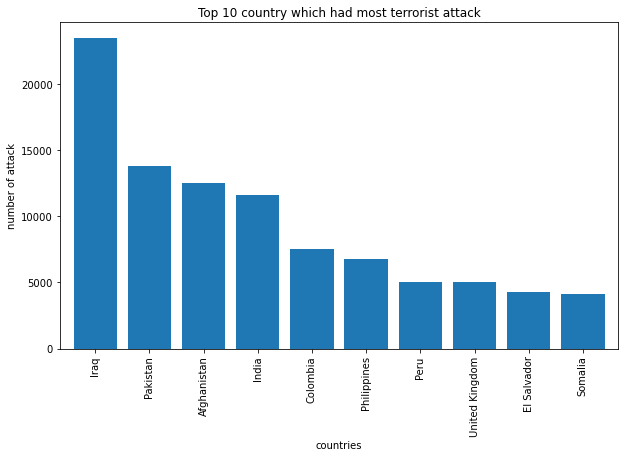

In [76]:
plt.figure(figsize=(10,6))
df['Country'].value_counts().head(10).plot.bar(width=0.8,align='center')
plt.title('Top 10 country which had most terrorist attack')
plt.xlabel('countries')
plt.ylabel('number of attack')
plt.show()

# Insights:
Iraq has maximum terrorist attack

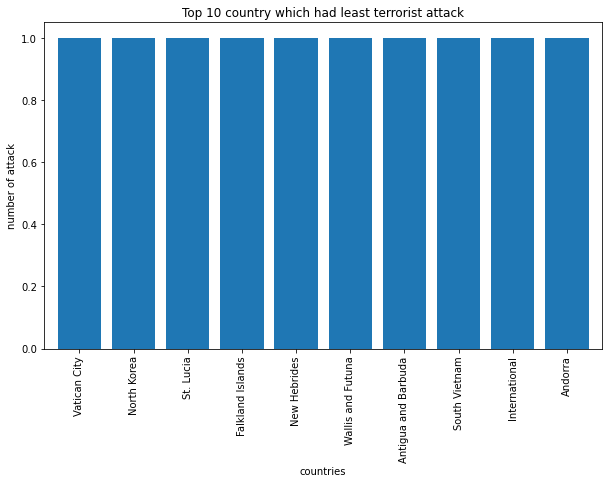

In [77]:
plt.figure(figsize=(10,6))
df['Country'].value_counts(ascending=True).head(10).plot.bar(width=0.8,align='center')
plt.title('Top 10 country which had least terrorist attack')
plt.xlabel('countries')
plt.ylabel('number of attack')
plt.show()

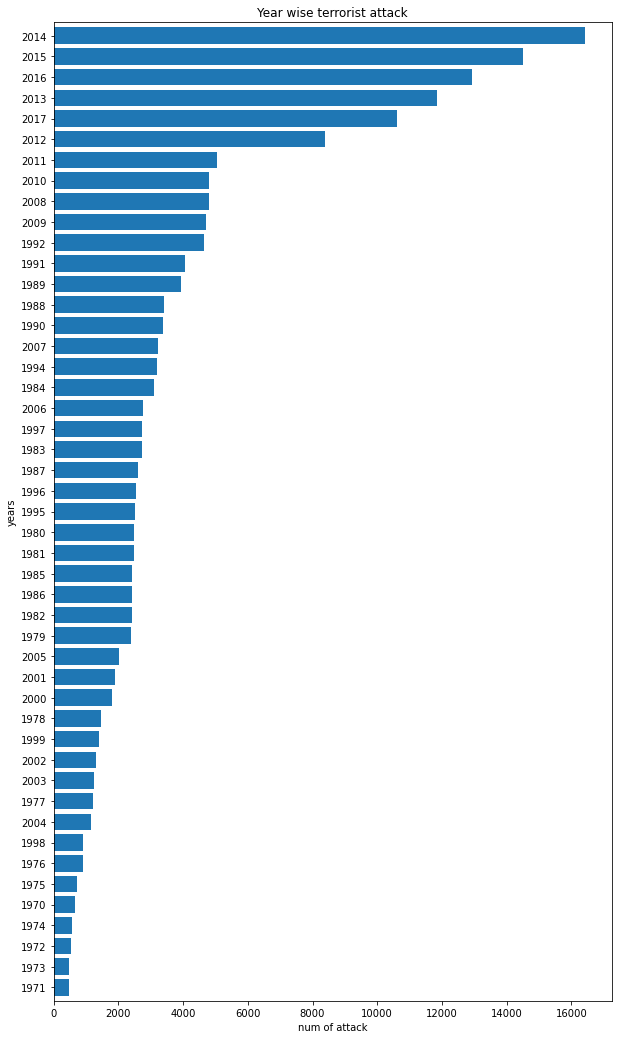

In [78]:
plt.figure(figsize=(10,18))
x=df['Year'].value_counts(ascending=True).plot.barh(width=0.8,align='center')
plt.title('Year wise terrorist attack')
plt.xlabel('num of attack')
plt.ylabel('years')
plt.show()

# Insights:
Year 2014 has maximum terrorist attack

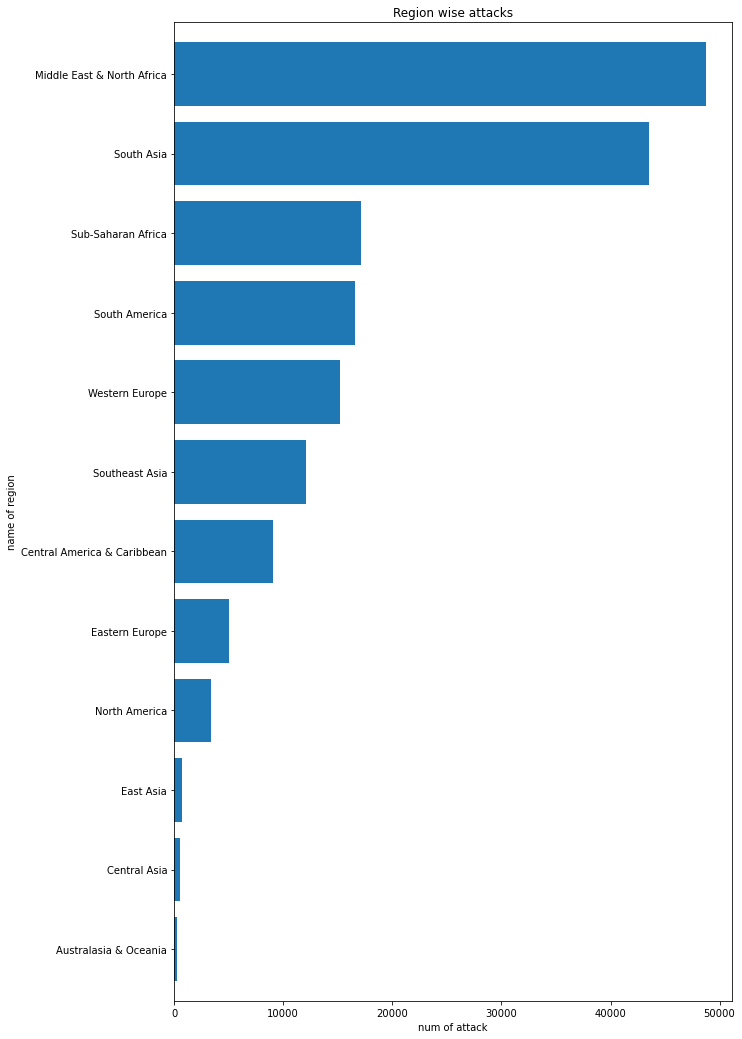

In [79]:
plt.figure(figsize=(10,18))
x=df['Region'].value_counts(ascending=True).plot.barh(width=0.8,align='center')
plt.title('Region wise attacks')
plt.xlabel('num of attack')
plt.ylabel('name of region')
plt.show()

# Insights:
Middle East and north africa has the maximum terrorist attack

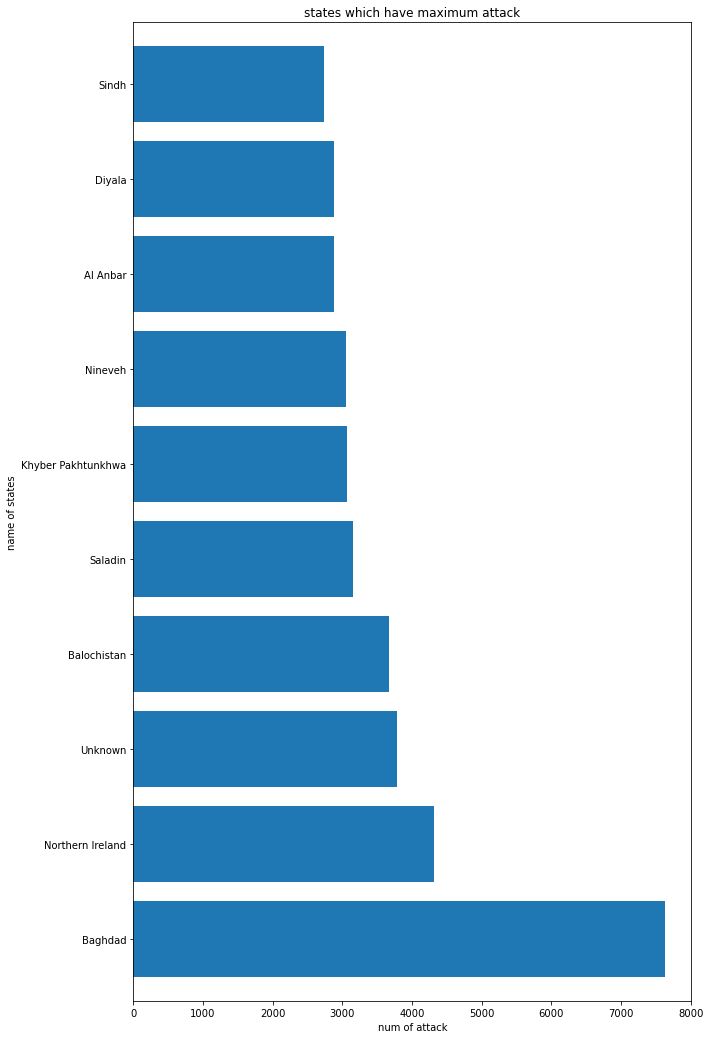

In [81]:
plt.figure(figsize=(10,18))
x=df['State'].value_counts().head(10).plot.barh(width=0.8,align='center')
plt.title('states which have maximum attack')
plt.xlabel('num of attack')
plt.ylabel('name of states')
plt.show()

# Insights:
Baghdad has maximum Attack

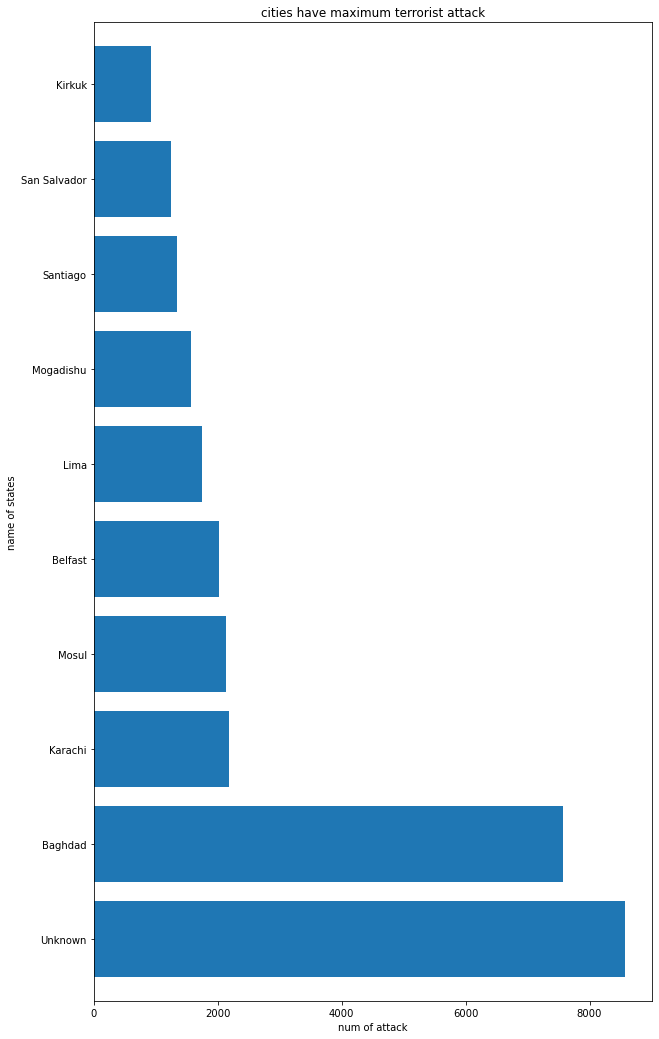

In [82]:
plt.figure(figsize=(10,18))
df['City'].value_counts().head(10).plot.barh(width=0.8,align='center')
plt.title('cities have maximum terrorist attack')
plt.xlabel('num of attack')
plt.ylabel('name of states')
plt.show()

# Insights:
Baghdad and Karachi have maximum attack


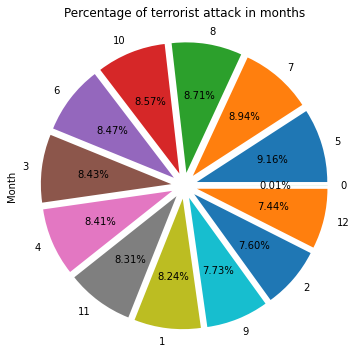

In [83]:
plt.figure(figsize=(10,6))
df['Month'].value_counts().plot.pie(explode=[0.1]*13,autopct='%.2f%%')
plt.title('Percentage of terrorist attack in months')
plt.show()


# Insights:
All month have average attack and 5th month has 9.16% silightly more attack  

In [78]:
df['AttackType'].value_counts()

Bombing/Explosion                      82152
Armed Assault                          41356
Assassination                          18889
Hostage Taking (Kidnapping)            10983
Facility/Infrastructure Attack          9348
Unknown                                 6933
Hostage Taking (Barricade Incident)      939
Unarmed Assault                          934
Hijacking                                653
Name: AttackType, dtype: int64

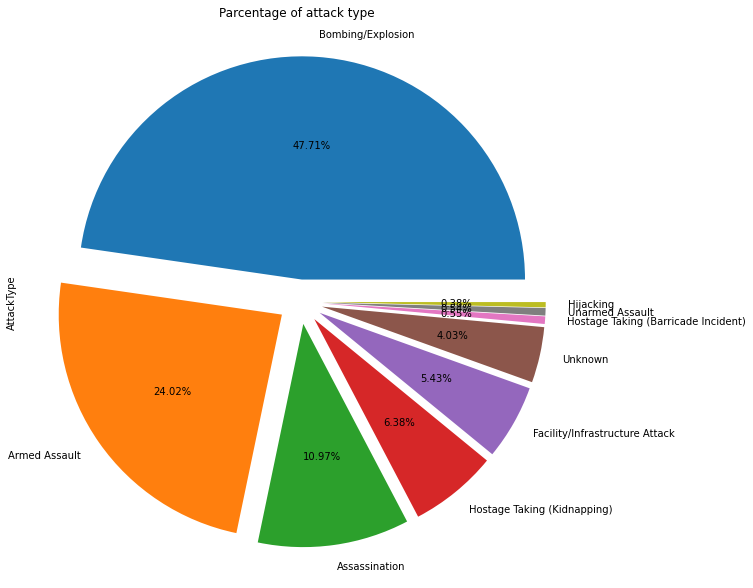

In [84]:
plt.figure(figsize=(10,25))
df['AttackType'].value_counts().plot.pie(explode=[0.1]*9,autopct='%.2f%%')
plt.title('Parcentage of attack type  ')
plt.show()

# Insights:
47.71% attack type have Bombing/Explosion

In [91]:
df['Target'].value_counts().head(10)

Civilians        6913
Unknown          5504
Soldiers         3093
Patrol           2930
Checkpoint       2776
Vehicle          2606
Officers         1774
Village          1555
Military Unit    1522
Convoy           1260
Name: Target, dtype: int64

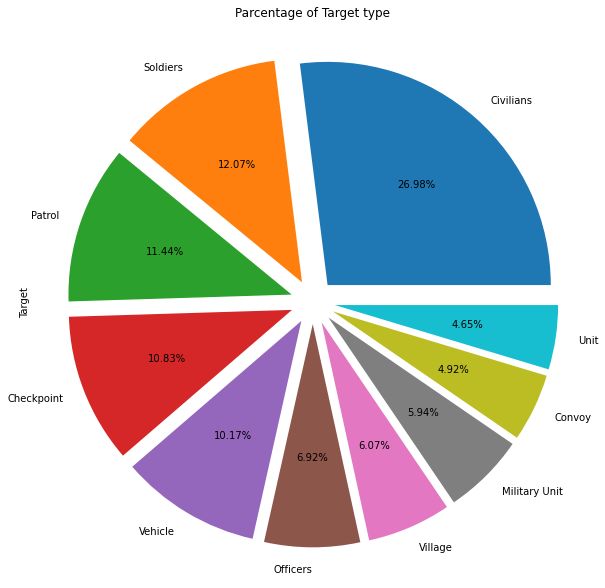

In [85]:
plt.figure(figsize=(10,25))
df['Target'].value_counts().drop('Unknown').head(10).plot.pie(explode=[0.1]*10,autopct='%.2f%%')
plt.title('Parcentage of Target type')
plt.show()

# Insights:
26.98% civilians had targeted by terrorist 

In [95]:
df['Target_type'].value_counts()#.head(10)

Private Citizens & Property       41481
Military                          27559
Police                            23831
Government (General)              20516
Business                          18932
Transportation                     6111
Unknown                            5229
Religious Figures/Institutions     4295
Educational Institution            4179
Utilities                          4169
Government (Diplomatic)            3526
Terrorists/Non-State Militia       3005
Journalists & Media                2887
Violent Political Party            1806
Airports & Aircraft                1320
NGO                                 956
Telecommunication                   927
Tourists                            429
Maritime                            340
Food or Water Supply                298
Abortion Related                    257
Other                               134
Name: Target_type, dtype: int64

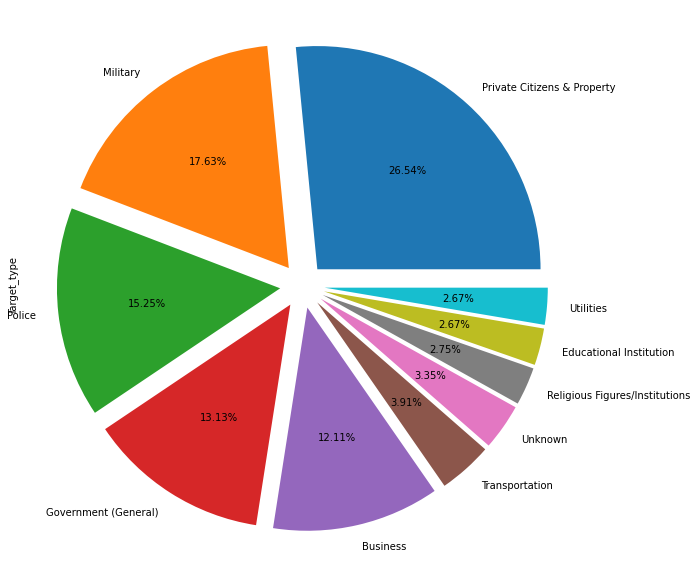

In [96]:
plt.figure(figsize=(10,25))
df['Target_type'].value_counts().head(10).plot.pie(explode=[0.1]*10,autopct='%.2f%%')
plt.show()

# Insights:
26.54% Private citizens & Property had target Type by terrorist

In [97]:
df['Group'].value_counts()

Unknown                                          79811
Taliban                                           7301
Islamic State of Iraq and the Levant (ISIL)       5187
Shining Path (SL)                                 3758
Al-Shabaab                                        3266
                                                 ...  
Volunteers of Innocent People of Nagas (VIPN)        1
Italian Combatents for Alto Adige                    1
Patriotic Resistance Army (ERP)                      1
Students For Insurrection                            1
Al-Fajr                                              1
Name: Group, Length: 3537, dtype: int64

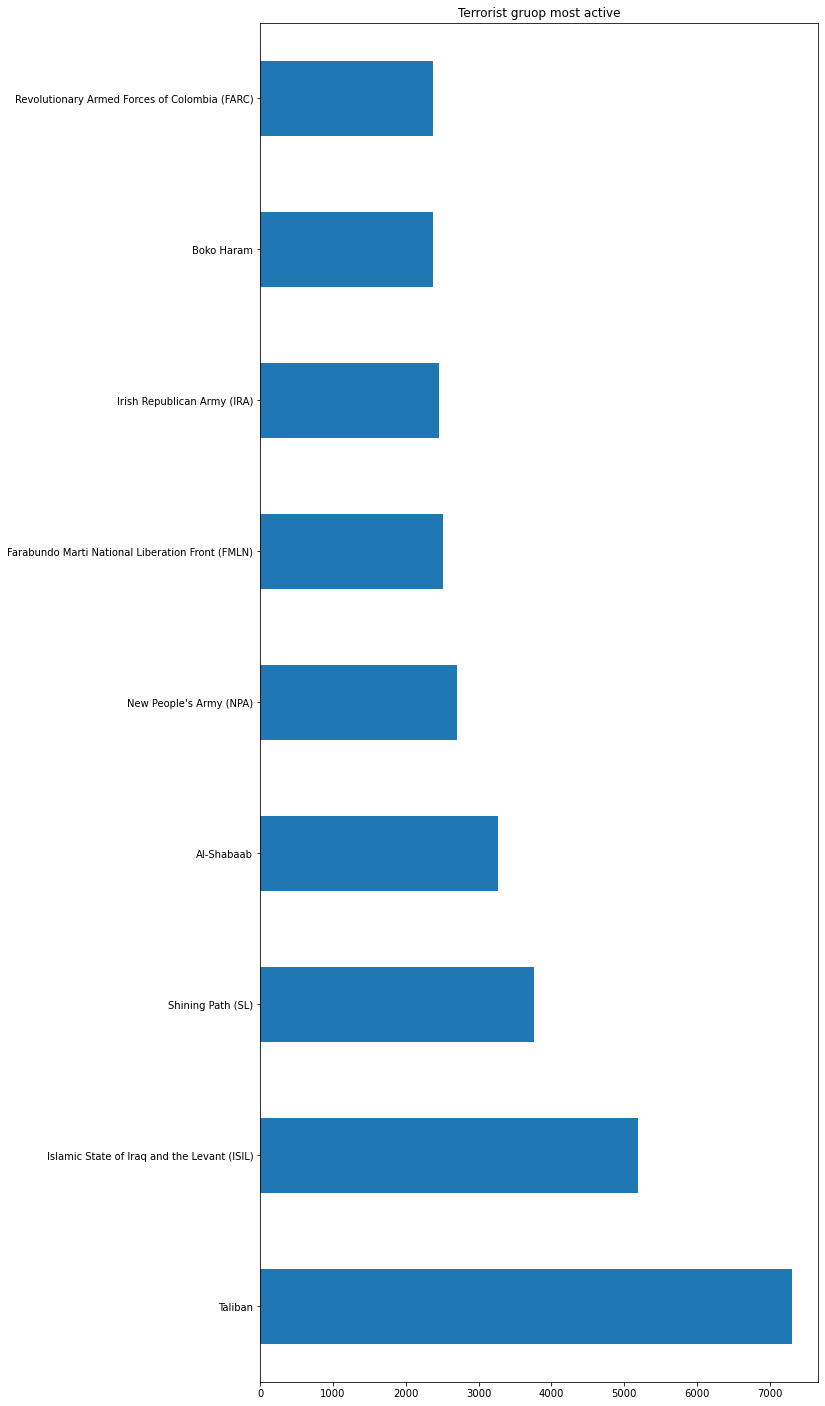

In [86]:
plt.figure(figsize=(10,25))
df['Group'].value_counts().head(10).drop('Unknown').plot.barh()
plt.title('Terrorist gruop most active')
plt.show()

# Insights:
Taliban had done maximum terrorist attack

In [104]:
df['Weapon_type'].value_counts()

Explosives                                                                     86370
Firearms                                                                       57410
Unknown                                                                        14510
Incendiary                                                                      9575
Melee                                                                           3535
Chemical                                                                         321
Sabotage Equipment                                                               136
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            112
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

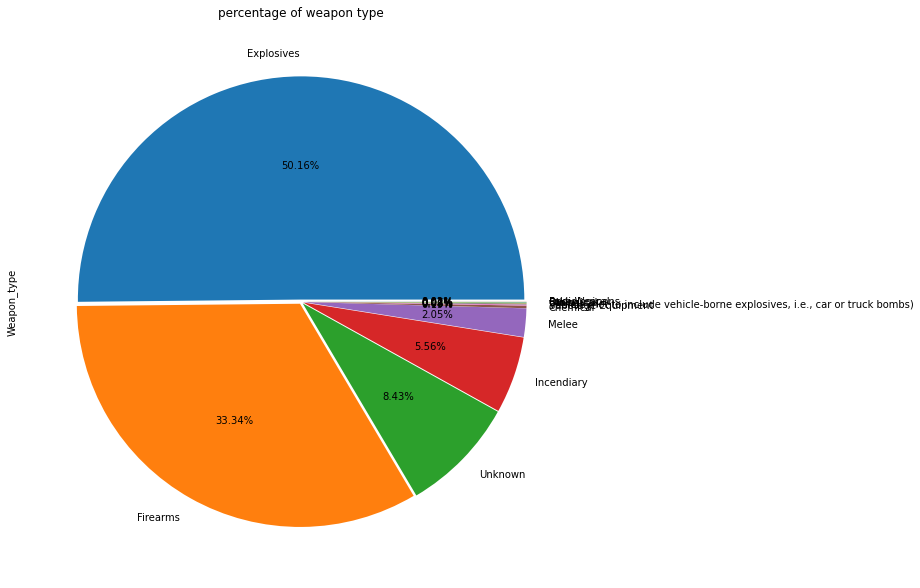

In [112]:
plt.figure(figsize=(10,20))
df['Weapon_type'].value_counts().plot.pie(explode=[0.01]*12,autopct='%.2f%%')
plt.title('percentage of weapon type')
plt.show()

# Insights:
50.16% Explosives weapon type used by terrorist

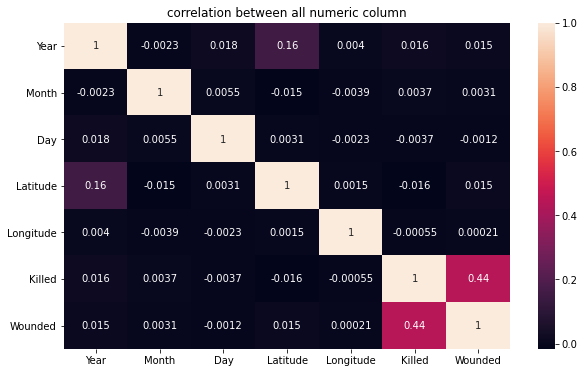

In [87]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.title('correlation between all numeric column')
plt.show()

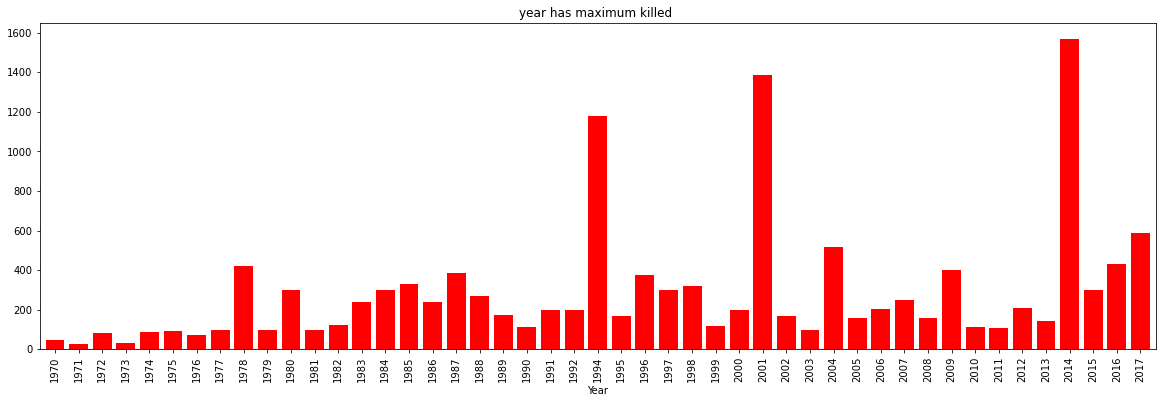

In [88]:
plt.figure(figsize=(20,6))
df.groupby('Year')['Killed'].max().plot.bar(width=0.8,align='center',color='red')
plt.title('year has maximum killed ')
plt.show()

# Insights:
 year 2014 had maximum no of killed people

In [163]:
df.groupby('Year')['Killed'].sum().sort_values(ascending=False)

Year
2014    44351
2015    38361
2016    34569
2017    26317
2013    22207
2012    15385
2007    12810
1984    10337
1997    10117
1992     9631
1983     9433
2006     9367
2009     9273
2008     9157
1991     8390
2011     8212
1989     8114
2010     7826
2001     7728
1994     7616
1988     7197
1990     6988
1985     6985
1996     6827
2005     6331
1987     6115
1995     5864
2004     5743
1982     5136
1986     4931
1981     4847
2002     4802
1998     4659
2000     4403
1980     4391
1999     3393
2003     3313
1979     2079
1978     1456
1976      674
1975      616
1972      565
1974      539
1977      456
1973      370
1970      174
1971      173
Name: Killed, dtype: int64

In [28]:
df.groupby('Year')['Wounded'].max().sort_values(ascending=False)

Year
2001    8191
1995    5500
1998    4000
2016    1500
1996    1272
2008    1001
2017     851
2006     817
1992     800
1984     751
2007     750
2004     727
1982     700
2009     552
2005     542
1994     500
2015     400
2012     400
2013     400
2014     400
1983     319
2010     301
2002     300
1981     300
1987     300
1976     285
1989     250
1985     250
1973     238
1986     230
1997     227
2003     224
1980     215
1999     200
1991     176
2011     168
1978     160
1990     150
2000     149
1988     133
1972     130
1974     102
1975     100
1979      78
1977      50
1971      27
1970      20
Name: Wounded, dtype: int64

# Analysis on India

In [91]:
india_df=df[df.Country=='India']
india_df.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type
1186,1972,2,22,India,Delhi,South Asia,New Delhi,28.585836,77.153336,Hijacking,0,0,B-747,Palestinians,Airports & Aircraft,Explosives
2764,1975,1,2,India,Bihar,South Asia,Samastipur,25.863042,85.781004,Bombing/Explosion,4,0,Lalit Narayan Mishra and a legislator,Ananda Marga,Government (General),Explosives
3857,1976,5,26,India,Delhi,South Asia,New Delhi,28.585836,77.153336,Bombing/Explosion,0,0,New Delhi airport,Unknown,Airports & Aircraft,Explosives
5327,1977,9,28,India,Maharashtra,South Asia,Bombay,19.075984,72.877656,Hijacking,0,0,DC-8,Japanese Red Army (JRA),Airports & Aircraft,Firearms
7337,1979,1,13,India,Assam,South Asia,Unknown,26.200605,92.937574,Armed Assault,0,0,patrol,Naga People,Police,Firearms


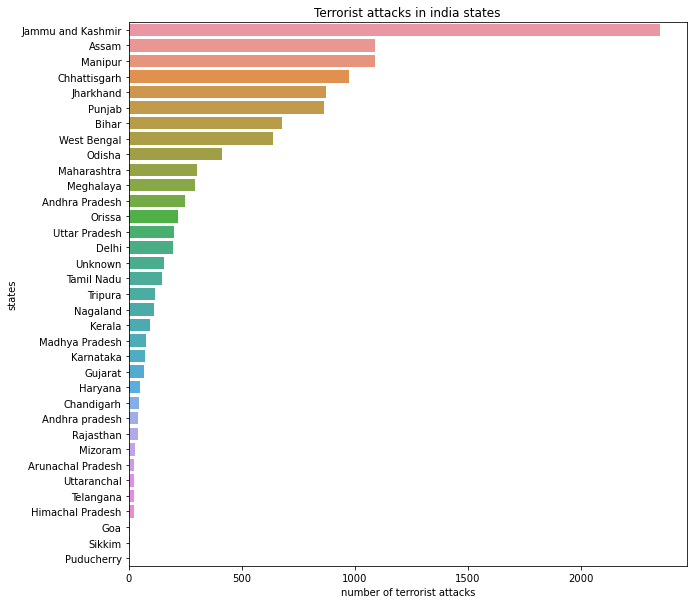

In [41]:
plt.figure(figsize=(10,10))
x=india_df['State'].value_counts()
sns.barplot(x,y=india_df['State'].value_counts().index)
plt.xlabel('number of terrorist attacks')
plt.ylabel('states')
plt.title('Terrorist attacks in india states')
plt.show()

# Insights:
Jummu and akashmir have maximum terrorist attack in india

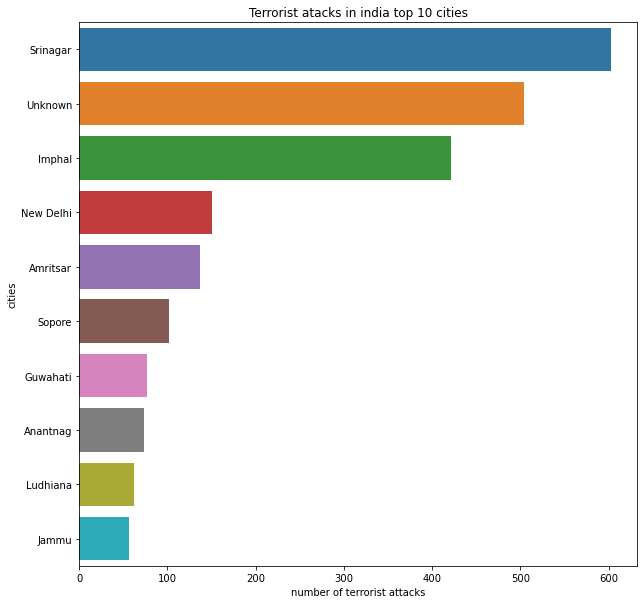

In [45]:
plt.figure(figsize=(10,10))
x=india_df['City'].value_counts().head(10)
sns.barplot(x,y=india_df['City'].value_counts().head(10).index)
plt.xlabel('number of terrorist attacks')
plt.ylabel('cities')
plt.title('Terrorist atacks in india top 10 cities')
plt.show()

# Insights:
Srinagar city has maximum attack 

In [51]:
india_df['Year'].value_counts()

2016    1019
2017     964
2015     867
2014     850
2013     681
2009     671
2010     663
2011     638
2012     596
2008     521
1988     352
1990     331
1989     315
1991     307
2001     234
1992     224
2003     196
2002     181
2000     180
1997     172
2006     167
1996     163
2007     149
1987     147
2005     145
1995     125
1984     121
1999     112
2004     108
1986      96
1994      93
1998      52
1983      44
1985      38
1979      20
1981      16
1982      13
1980      10
1972       1
1977       1
1975       1
1976       1
Name: Year, dtype: int64

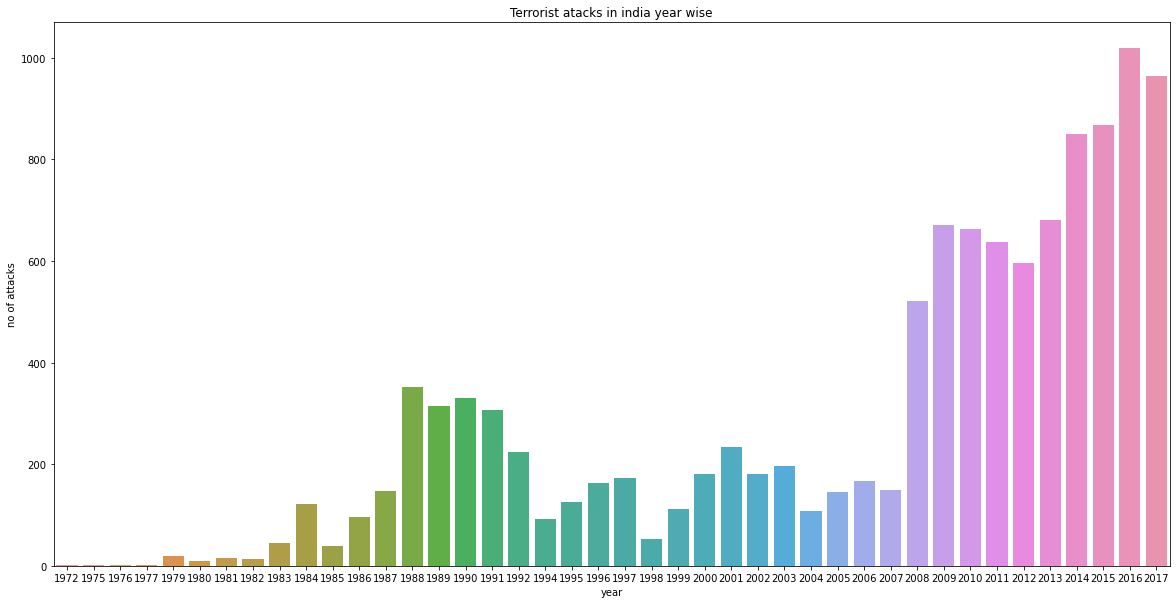

In [52]:
plt.figure(figsize=(20,10))
x=india_df['Year'] #.value_counts()
sns.countplot(x)
plt.xlabel('year')
plt.ylabel('no of attacks')
plt.title('Terrorist atacks in india year wise')
plt.show()

# Insights:
year 2016 has maximum terrorist attack in india

In [92]:
india_df['Group'].value_counts()

Unknown                                           4192
Communist Party of India - Maoist (CPI-Maoist)    1851
Maoists                                           1374
Sikh Extremists                                    663
United Liberation Front of Assam (ULFA)            349
                                                  ... 
Laiq Chanio Group of Dacoit Bandits                  1
Bengali Tiger Force (BTF)                            1
Barak Valley Tiger Force (BVTF)                      1
New People's Army (NPA)                              1
Organized Crime                                      1
Name: Group, Length: 301, dtype: int64

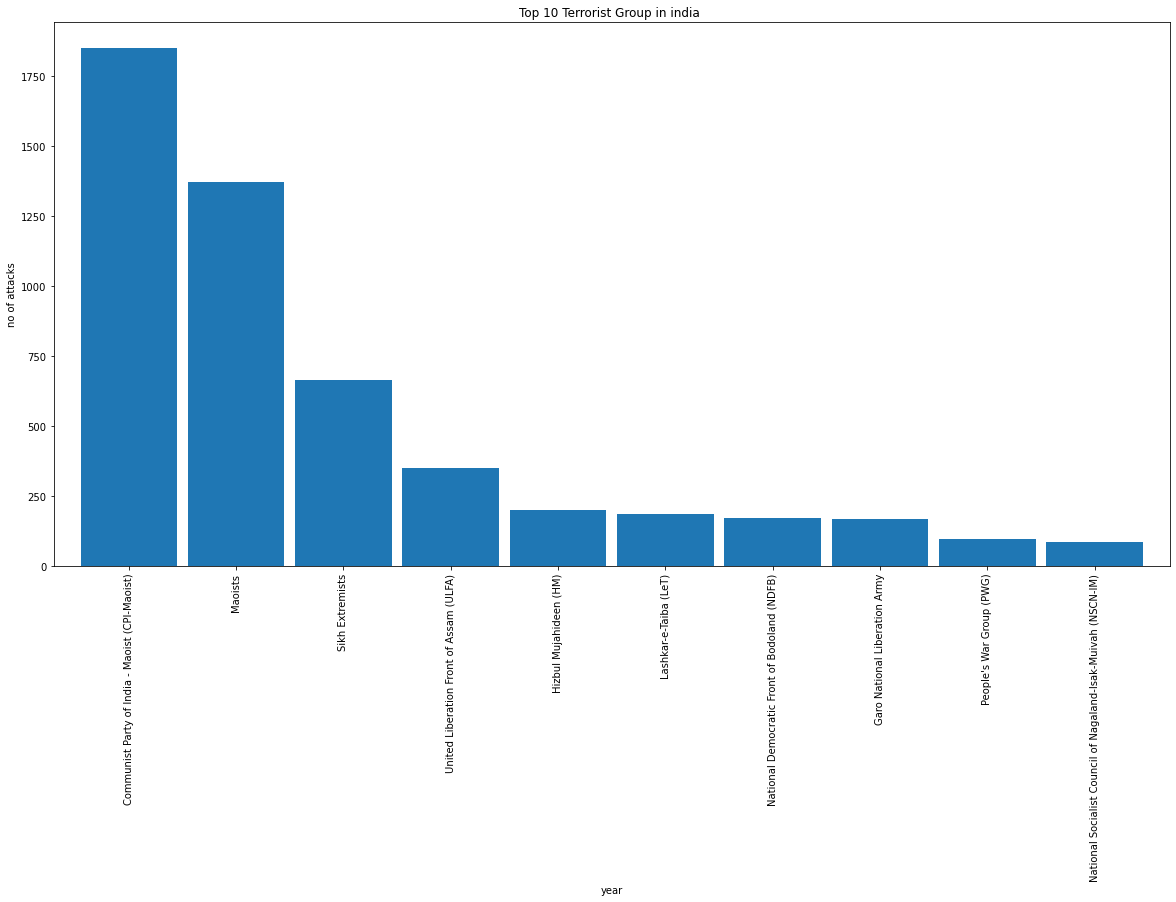

In [93]:
plt.figure(figsize=(20,10))
india_df['Group'].value_counts().drop('Unknown').head(10).plot.bar(width=0.9) #.value_counts()
plt.xlabel('year')
plt.ylabel('no of attacks')
plt.title('Top 10 Terrorist Group in india ')
plt.show()

# Insights:
CPI-Maoist group had maximum terrorist attack 

# The Most Dangerous city in Jammu and Kashmir and the terrorist group which is most active in that city
Note:Ignoring the Unknown Terrorist Group. Here Dangerous related with the number of terrorist attacks. I will be printing the count of number of attacks in that city as integer value.

In [94]:
data=df[df['State']=='Jammu and Kashmir']['City']
data.value_counts().idxmax()

'Srinagar'

In [95]:
data.value_counts().max()

601

# Country with Highest Number of Terror Attack and the year in which the most number of terrorist attack happened in that country
I have printed the name of the country, count of terror attacks as integer value and the year in which most number of terriorist attacks happened in that country.

In [30]:
print("Country with most attack: ",df['Country'].value_counts().idxmax())

Country with most attack:  Iraq


In [31]:
print("Higest number of terrorist attack:,",df['Country'].value_counts().max())

Higest number of terrorist attack:, 23458


In [32]:
print("year Higest number of terrorist attack:",df['Year'].value_counts().idxmax())

year Higest number of terrorist attack: 2014


# Most Deadliest attack in a history of HumanKind (According to the given dataset)
I have printed count of Killed people as integer value, the country in which the attack happened, and the terriorist group which was involved in the attack. Here Deadliest attack means, in which the most number of people killed.

In [33]:
df=df[df.Killed==df.Killed.max()]
killed=df.Killed.iloc[0]
country=df.Country.iloc[0]
group=df.Group.iloc[0]
print(int(killed),(country),(group))

1570 Iraq Islamic State of Iraq and the Levant (ISIL)


# There was formation of new government in India on 26 May 2014. So current government's span is from 26th May 2014 to current. So, the two things I have found out from this period are:
Total number of attacks done in this period in India. Terrorist group which was most active in this period in India. Most active means, group which has done maximum number of attacks.

In [96]:
a=df[df.Day>=26]
b=a[a.Year==2014]
c=b[b.Country=='India']
ans1=c[c.Month==5]
del a
del b
del c
a=df[df.Year==2014]
b=a[a.Country=='India']
ans2=b[b.Month>5]
del a
del b
a=df[df.Country=='India']
ans3=a[a.Year>2014]
count=ans1.shape[0]+ans2.shape[0]+ans3.shape[0]
print(count, end=' ')
ans1=ans1[ans1.Group!='Unknown']
ans2=ans2[ans2.Group!='Unknown']
ans3=ans3[ans3.Group!='Unknown']
print(ans3.Group.describe().top)

3307 Maoists


# Frequency of the Casualty in Red Corridor states and in Jammu and Kashmir. Here Frequency is (Total Casualty/Total Number of a year)
Red Corridor state includes Jharkhand, Odisha, Andhra Pradesh, and Chhattisgarh. Here Casualty=Killed +Wounded. I have separately managed the nan values present in the killed and wounded feature.

In [97]:
df_terrorism=df.copy()

year=len(set(df_terrorism['Year']))


df_terrorism=df_terrorism[df_terrorism['Country']=='India']

df_terrorism['Casualty']=df_terrorism['Killed']+df_terrorism['Wounded']

Jammu_state=df_terrorism[df_terrorism['State']=='Jammu and Kashmir']

red_state=df_terrorism[(df_terrorism['State']=='Jharkhand')|(df_terrorism['State']=='Odisha')
                       |(df_terrorism['State']=='Andhra Pradesh')|(df_terrorism['State']=='Chhattisgarh')]

red_casualty=int(np.sum(red_state['Casualty']))

Jammu_casualty=int(np.sum(Jammu_state['Casualty']))

print(red_casualty//year,Jammu_casualty//year)

119 267


# Conclusion and Results :
1. Year with Maximum Attacks: 2014
2. Country with the Most Attacks: Iraq
3. City with the Most Attacks: Baghdad
4. Most Common Attack: Bombing/Explosion
5. Maximum Casualties in an Attack: Armed Assault
6. Most Wounded in an Attack: Bombing/Explosion
7. Most Common Targets in an Attack: Private Citizens and Property
8. Terrorist Group responsible for Maximum Attacks: Taliban
9. Mostly terrorist used weapon type:Explosives
10. Region with the most attacks: Middle east & north africa
11. Year with Maximum killed : 2014
12. In india's states  has most number of terrorist attack : Jammu & kashmir
13.  In india's states  has city most number of terrorist attack : Srinagar
14. In india, year with maximum attack : 2016
15. CPI-Maoist group had maximum terrorist attack in india